In [1]:
!pip install 'plotnine[all]'

In [184]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

In [185]:
# Creating a dataframe for each file
# The dataset from Kaggle:
tweets = pd.read_csv("https://raw.githubusercontent.com/SarahBuechner/DMML2019_Team_Google/master/Database/Tweets.csv")
AAL = pd.read_csv("https://raw.githubusercontent.com/SarahBuechner/DMML2019_Team_Google/master/Database/AAL.csv")
DAL = pd.read_csv("https://raw.githubusercontent.com/SarahBuechner/DMML2019_Team_Google/master/Database/DAL.csv")
LUV = pd.read_csv("https://raw.githubusercontent.com/SarahBuechner/DMML2019_Team_Google/master/Database/LUV.csv")
UAL = pd.read_csv("https://raw.githubusercontent.com/SarahBuechner/DMML2019_Team_Google/master/Database/UAL.csv")

In [186]:
# Verifying all the dataframes have the same shape #
print(UAL.shape == AAL.shape == LUV.shape == DAL.shape)
print(tweets.shape)
tweets.head(10)

True
(14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [187]:
# Text Analytics
# We want to see if the Tweet's sentiment was correctly classified (neutra, positive, negative)
# X = column of Tweets
# y = column airline sentiment

# Step 1: Removing Stop words
#importing stop words from English language.
!pip install spacy
!python -m spacy download en
import spacy
from spacy.lang.en import English

spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

#Printing the total number of stop words:
print('Number of stop words: %d' % len(spacy_stopwords))

#Printing first ten stop words:
print('First ten stop words: %s' % list(spacy_stopwords)[:20])

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/Sarah/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/Users/Sarah/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')
Number of stop words: 326
First ten stop words: ['became', 'give', 'hundred', 'often', 'by', 'back', 'never', 'nothing', 'everywhere', 're', 'wherein', 'meanwhile', 'now', 'something', 'has', 'empty', 'any', 'among', 'again', 'go']


In [188]:
# Understanding what type is column with tweets
type(tweets["text"])


pandas.core.series.Series

In [210]:
#Implementation of stop words:
filtered_tweet=[]

#  "nlp" Object is used to create documents with linguistic annotations.

#text = tweets["text"]
text_all_lines = list(tweets["text"]) # Creates list of all column headers
text = text_all_lines[0]
nlp = English()
doc = nlp(text)

# filtering stop words
#until doc(i)=len(doc)
for word in doc:
    if word.is_stop==False:
        filtered_tweet.append(word)
print("Filtered Tweet:",filtered_tweet, len(doc))
print(doc)



Filtered Tweet: [@SouthwestAir, want, money, paid, early, bird, refunded, ., able, different, ., SW, worked] 27
@SouthwestAir just want the money I paid for early bird refunded. Noone seemed to be able at three different. SW should have that worked out


In [217]:
#For whole table

#Implementation of stop words:
list_filtered_tweet=[]


#  "nlp" Object is used to create documents with linguistic annotations.

#text = tweets["text"]
text_all_lines = list(tweets["text"]) # Creates list of all column headers
for line in text_all_lines[:10]:    
    filtered_tweet=[]
    #pd.DataFrame(list_filtered_tweet)
    nlp = English()
    doc = nlp(line)
    # filtering stop words
    for word in doc:
        if word.is_stop==False:
            filtered_tweet.append(word)
    list_filtered_tweet.append(filtered_tweet)

for item in list_filtered_tweet:
    print(item)


[@VirginAmerica, @dhepburn, said, .]
[@VirginAmerica, plus, added, commercials, experience, ..., tacky, .]
[@VirginAmerica, today, ..., mean, need, trip, !]
[@VirginAmerica, aggressive, blast, obnoxious, ", entertainment, ", guests, ', faces, &, amp, ;, little, recourse]
[@VirginAmerica, big, bad, thing]
[@VirginAmerica, seriously, pay, $, 30, flight, seats, playing, ., 
, bad, thing, flying, VA]
[@VirginAmerica, yes, ,, nearly, time, fly, VX, “, ear, worm, ”, wo, away, :)]
[@VirginAmerica, missed, prime, opportunity, Men, Hats, parody, ,, ., https://t.co/mWpG7grEZP]
[@virginamerica, ,, didn't, …, !, :-D]
[@VirginAmerica, amazing, ,, arrived, hour, early, ., good, .]


In [221]:
tweets.head()
tweets = pd.concat(tweets, list_filtered_tweet)


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [189]:
#Import the libraries for sentiment Analysis

!pip install -U textblob
!python -m textblob.download_corpora
import nltk
from textblob import TextBlob

Requirement already up-to-date: textblob in /Users/Sarah/anaconda3/lib/python3.7/site-packages (0.15.3)
[nltk_data] Downloading package brown to /Users/Sarah/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Sarah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Sarah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Sarah/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /Users/Sarah/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/Sarah/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [192]:
# Sentiment Analysis

tweet_to_be_classified= tweets["text"]
text_1 = tweet_to_be_classified[12556]

obj = TextBlob(text_1)#returns the sentiment of text
#by returning a value between -1.0 and 1.0
sentiment = obj.sentiment
#sentiment = obj.sentiment.polarity => only provides info about polarity

#polarity: Polarity is a float value within the range [-1.0 to 1.0] where 0 indicates neutral, +1 indicates a very positive sentiment and -1 represents a very negative sentiment.
#subjectivity: Subjectivity is a float value within the range [0.0 to 1.0] where 0.0 is very objective and 1.0 is very subjective. Subjective sentence expresses some personal feelings, views, beliefs, opinions, allegations, desires, beliefs, suspicions, and speculations where as Objective sentences are factual.

print(tweet_to_be_classified[12556],sentiment)

@AmericanAir 2284, four hours Late Flightrs and we are finally flying out...too bad I missed my event Sentiment(polarity=-0.33333333333333326, subjectivity=0.7555555555555555)


In [200]:
# Sentiment Analysis
tweet_to_be_classified= tweets["text"]
list_sentiments = []

for i in range(0,len(tweets)):
    tweet_to_be_classified_blob = TextBlob(tweet_to_be_classified[i]) #returns the sentiment of text by returning a value between -1.0 and 1.0
    list_sentiments.append(tweet_to_be_classified_blob.sentiment)
    #print(tweet_to_be_classified[i], tweet_to_be_classified_blob.sentiment)

print(list_sentiments)

#Check if done for all ines
len(list_sentiments)



[Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=-0.390625, subjectivity=0.6875), Sentiment(polarity=0.0062500000000000056, subjectivity=0.35), Sentiment(polarity=-0.3499999999999999, subjectivity=0.3833333333333333), Sentiment(polarity=-0.2083333333333333, subjectivity=0.6333333333333333), Sentiment(polarity=0.4666666666666666, subjectivity=0.7666666666666666), Sentiment(polarity=0.2, subjectivity=0.2), Sentiment(polarity=1.0, subjectivity=1.0), Sentiment(polarity=0.4666666666666666, subjectivity=0.6), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=0.4125, subjectivity=0.775), Sentiment(polarity=0.3333333333333333, subjectivity=0.4166666666666667), Sentiment(polarity=0.5, subjectivity=1.0), Sentiment(polarity=0.25, subjectivity=0.2), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=0.35625, subjectivity=0.4583333333333333), Sentiment(polarity=0.047619047619047616, subjectivity=0.2900793650793651), Sen

14640

In [207]:
#Other version:

# Sentiment Analysis
tweet_to_be_classified= tweets["text"]
list_sentiments = []

for element in tweet_to_be_classified:
    list_sentiments.append(TextBlob(element).sentiment)
    

print(list_sentiments)

#Check if done for all ines
len(list_sentiments)

[Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=-0.390625, subjectivity=0.6875), Sentiment(polarity=0.0062500000000000056, subjectivity=0.35), Sentiment(polarity=-0.3499999999999999, subjectivity=0.3833333333333333), Sentiment(polarity=-0.2083333333333333, subjectivity=0.6333333333333333), Sentiment(polarity=0.4666666666666666, subjectivity=0.7666666666666666), Sentiment(polarity=0.2, subjectivity=0.2), Sentiment(polarity=1.0, subjectivity=1.0), Sentiment(polarity=0.4666666666666666, subjectivity=0.6), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=0.4125, subjectivity=0.775), Sentiment(polarity=0.3333333333333333, subjectivity=0.4166666666666667), Sentiment(polarity=0.5, subjectivity=1.0), Sentiment(polarity=0.25, subjectivity=0.2), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=0.35625, subjectivity=0.4583333333333333), Sentiment(polarity=0.047619047619047616, subjectivity=0.2900793650793651), Sen

14640

In [206]:
pd.DataFrame(list_sentiments)

,polarity,subjectivity
0,0.000000,0.000000
1,0.000000,0.000000
2,-0.390625,0.687500
3,0.006250,0.350000
4,-0.350000,0.383333
...,...,...
14635,0.000000,0.600000
14636,-0.300000,0.600000
14637,0.000000,0.000000
14638,-0.125000,0.375000


In [32]:
# Column values
# Data types
print(tweets.dtypes)

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object


In [33]:
## DATA CLEANING
# Drop the columns we don't use and remove NaN
tweets = tweets.drop(columns=['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'user_timezone'])

# Statistical summary of the DataFrame, with quartiles, median, etc.
print(tweets[['airline_sentiment_confidence', 'negativereason_confidence']].describe())

       airline_sentiment_confidence  negativereason_confidence
count                  14640.000000               10522.000000
mean                       0.900169                   0.638298
std                        0.162830                   0.330440
min                        0.335000                   0.000000
25%                        0.692300                   0.360600
50%                        1.000000                   0.670600
75%                        1.000000                   1.000000
max                        1.000000                   1.000000


The most common class is negative mood = 62.69%


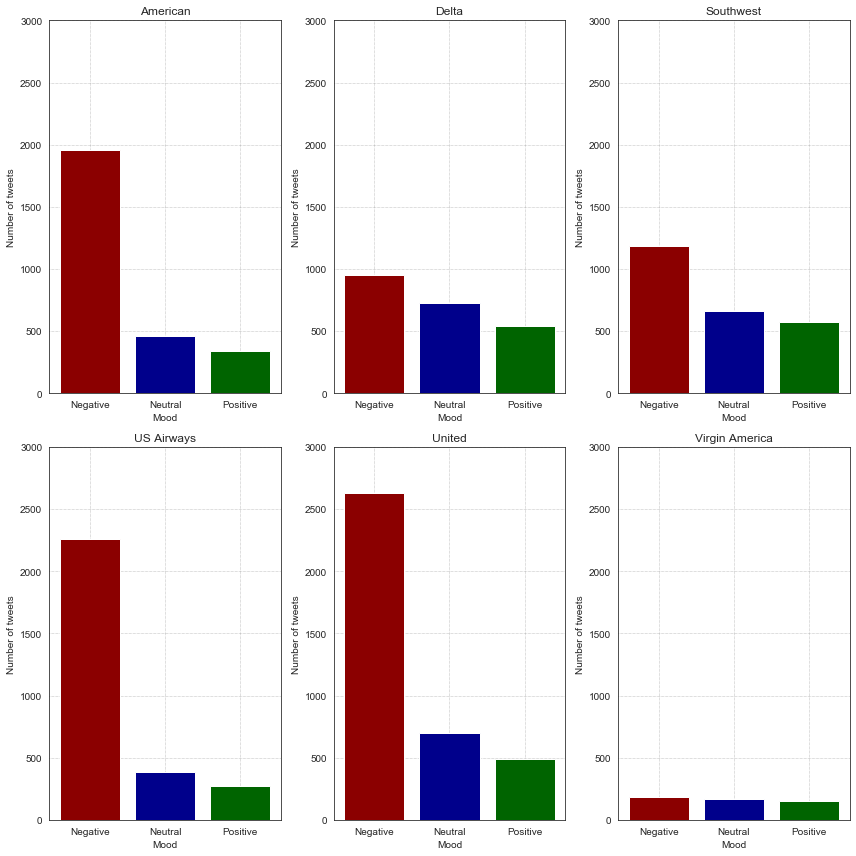

In [34]:
## EXPLORATORY DATA ANALYSIS
# 1) Sentiment Analysis by Airline
# We want to visualize the distribution sentiment analysis by company.

def sentiment_by_airline(Airline):
  df=tweets[tweets['airline']==Airline]
  count=df['airline_sentiment'].value_counts()
  Index = [1,2,3]
  plt.bar(Index,count,color=['darkred', 'darkblue', 'darkgreen'])
  plt.xticks(Index,['Negative','Neutral','Positive'])
  plt.ylabel('Number of tweets')
  plt.xlabel('Mood')
  plt.title(Airline)
  plt.ylim(0,3000)
  plt.grid(which='major', linestyle=':', linewidth='0.5', color='grey')

airlines = ["American", "Delta", "Southwest", "US Airways", "United", "Virgin America"]
plt.figure(1,figsize=(12, 12))


for airline in airlines:
  plt.subplot(231 + airlines.index(airline))
  sentiment_by_airline(airline)
plt.tight_layout()

count=tweets['airline_sentiment'].value_counts()
print("The most common class is negative mood = "+"{:.2%}".format(count[0]/sum(count[0:3])))


The 3 main negative topics of American are: (1) Customer Service Issue, (2) Late Flight and (3) Cancelled Flight
The 3 main negative topics of Delta are: (1) Late Flight, (2) Customer Service Issue and (3) Can't Tell
The 3 main negative topics of Southwest are: (1) Customer Service Issue, (2) Cancelled Flight and (3) Can't Tell
The 3 main negative topics of US Airways are: (1) Customer Service Issue, (2) Late Flight and (3) Can't Tell
The 3 main negative topics of United are: (1) Customer Service Issue, (2) Late Flight and (3) Can't Tell
The 3 main negative topics of Virgin America are: (1) Customer Service Issue, (2) Flight Booking Problems and (3) Can't Tell


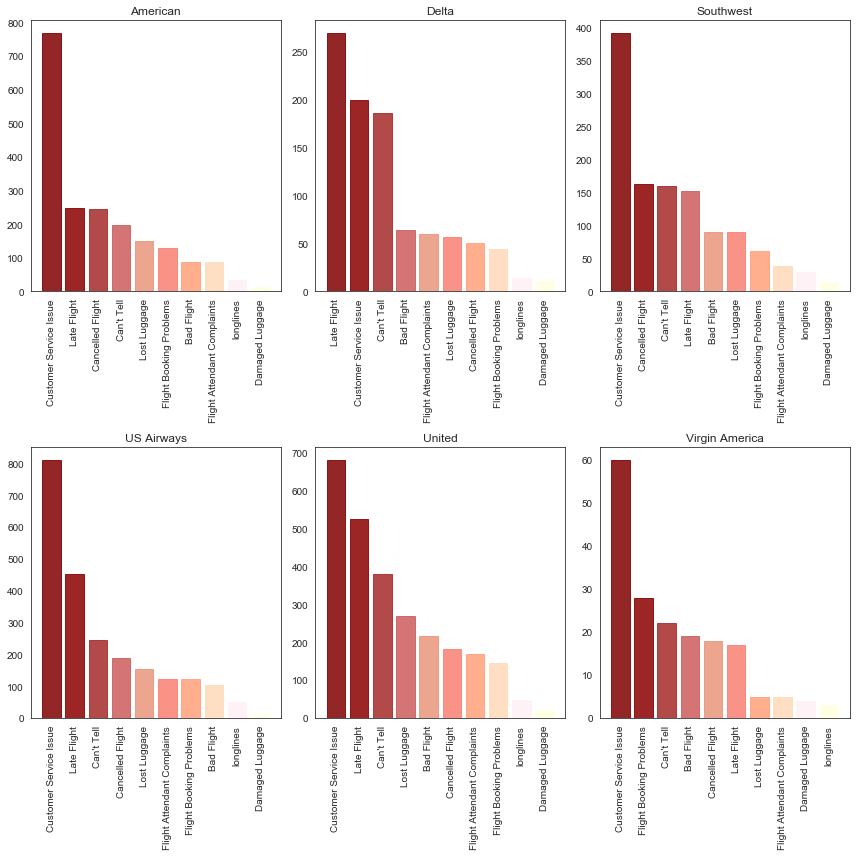

In [35]:
## Negative Reason by Airline
# In the previous graph we saw that the most common class was the Negative mood, now
# we want to visualize the negative ratings clustered on topics.
                                
cmap = ['maroon', 'darkred', 'brown', 'indianred', 'darksalmon', 'salmon', 'lightsalmon', 'peachpuff', 'lavenderblush', 'lightyellow']
def negative_reason(Airline):
  df=tweets[tweets['airline']== Airline]
  Neg_reasons_values = df['negativereason'].value_counts(sort=True)
  Neg_reasons_labels = dict(df['negativereason'].value_counts(sort=True))
  Index = range(len(Neg_reasons_values))
  barplot = plt.bar(Index,Neg_reasons_values, alpha = 0.85)
  
  plt.xticks(Index,Neg_reasons_labels, rotation = 90)
  plt.title(Airline)

  for color in cmap:
    barplot[cmap.index(color)].set_color(color)
  
  return ("The 3 main negative topics of " + Airline + " are: (1) " + list(Neg_reasons_labels.keys())[0] + 
  ", (2) " + list(Neg_reasons_labels.keys())[1] + " and (3) " + list(Neg_reasons_labels.keys())[2])

airlines = ["American", "Delta", "Southwest", "US Airways", "United", "Virgin America"]
plt.figure(1,figsize=(12, 12))

for airline in airlines:
  plt.subplot(231 + airlines.index(airline))
  print(negative_reason(airline))

plt.tight_layout()



/Users/Sarah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(0.335, 1.0)

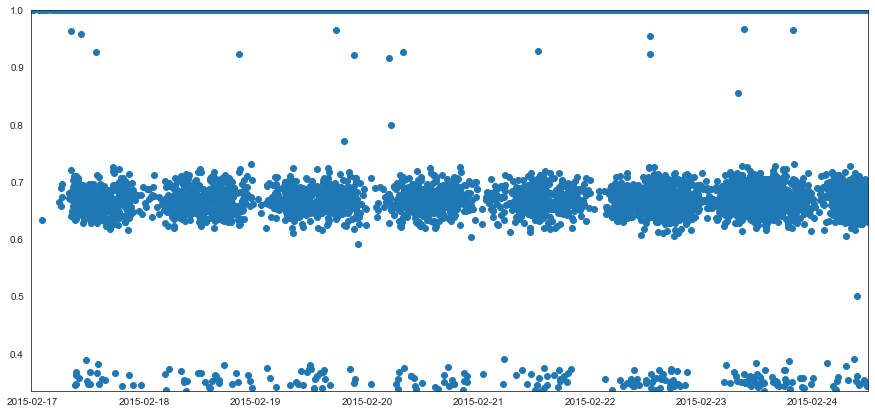

In [36]:
# The idea is to find out if there is any particular day/time when there are an unexpected volum of tweets...
df = tweets[['tweet_created', 'airline_sentiment_confidence']]
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
X = df['tweet_created']
y = df['airline_sentiment_confidence']

fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(X, y)
ax.set_xlim([min(X), max(X)])
ax.set_ylim([min(y), max(y)])


/Users/Sarah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

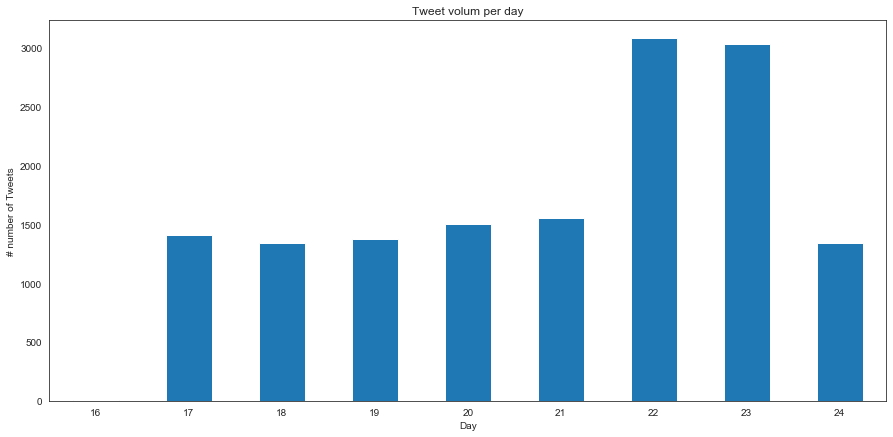

In [37]:
# Tweet volum per day
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
X = df['tweet_created']

fig, ax = plt.subplots(figsize=(15,7))
X.groupby([X.dt.day]).count().plot(kind="bar")
ax.set_title('Tweet volum per day')
ax.set_ylabel("# number of Tweets")
ax.set_xlabel("Day")
plt.xticks(rotation = 0)


/Users/Sarah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, '# number of Tweets')

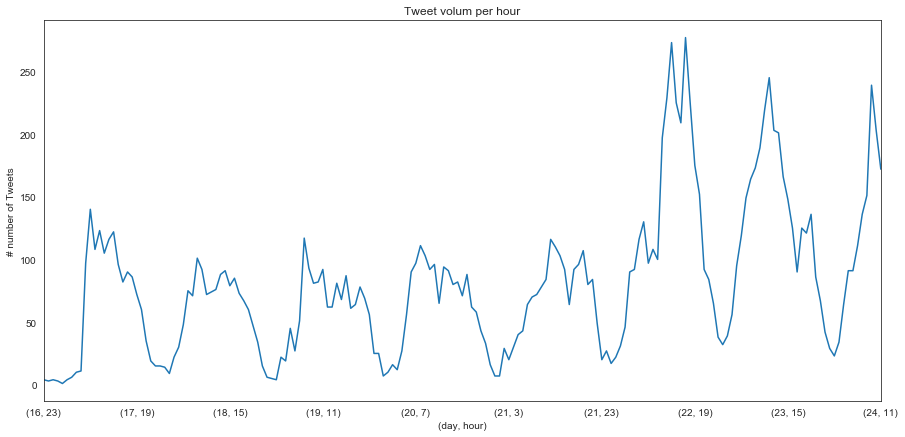

In [38]:
# Tweet volum per hour
df = tweets[['tweet_created', 'airline_sentiment_confidence']]
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
X = df['tweet_created']

fig, ax = plt.subplots(figsize=(15,7))
X.groupby([X.dt.day,X.dt.hour]).count().plot(ax=ax)
ax.set_title('Tweet volum per hour')
ax.set_xlabel("(day, hour)")
ax.set_ylabel("# number of Tweets")


Text(0.5, 1.0, 'American Airlines (AAL)')

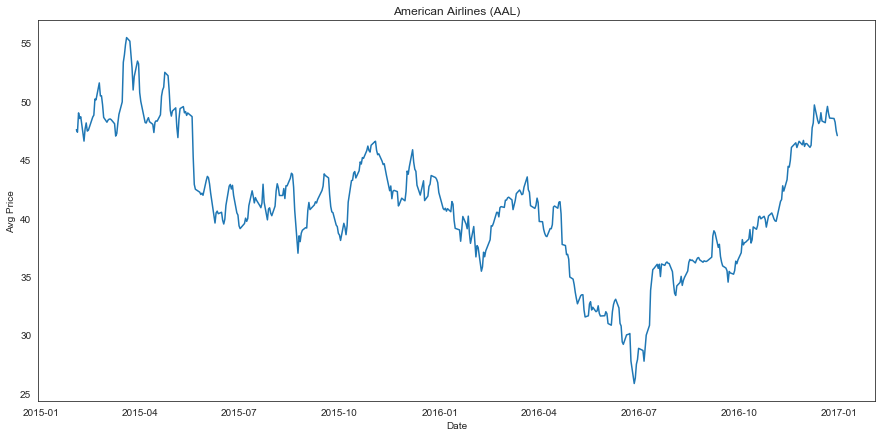

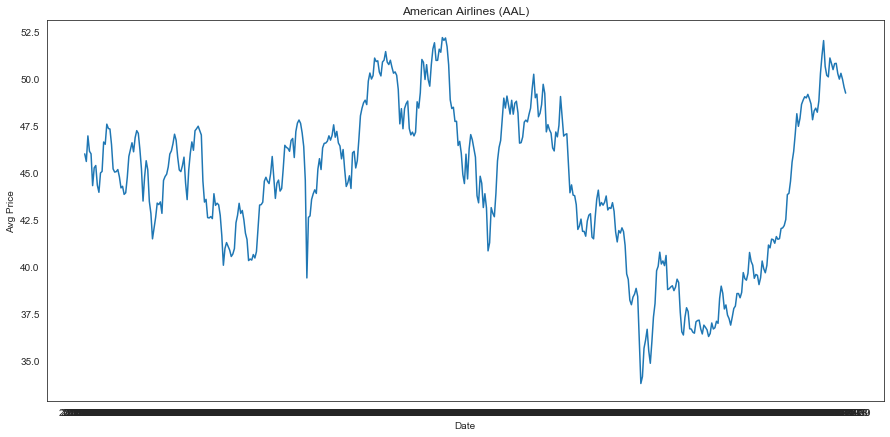

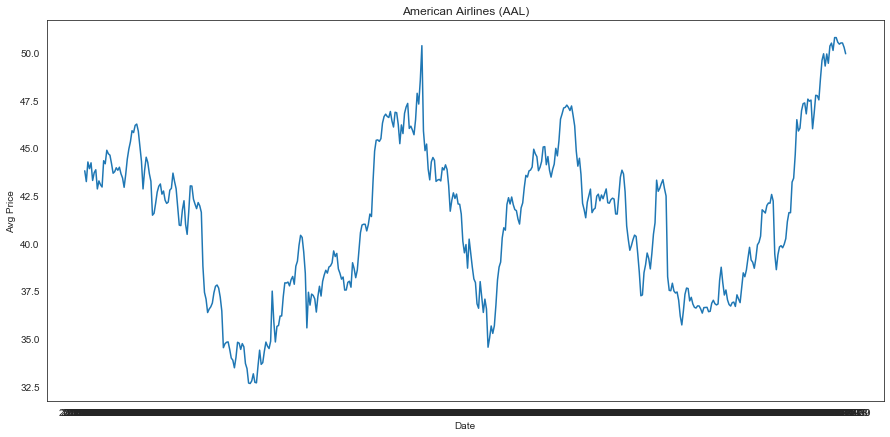

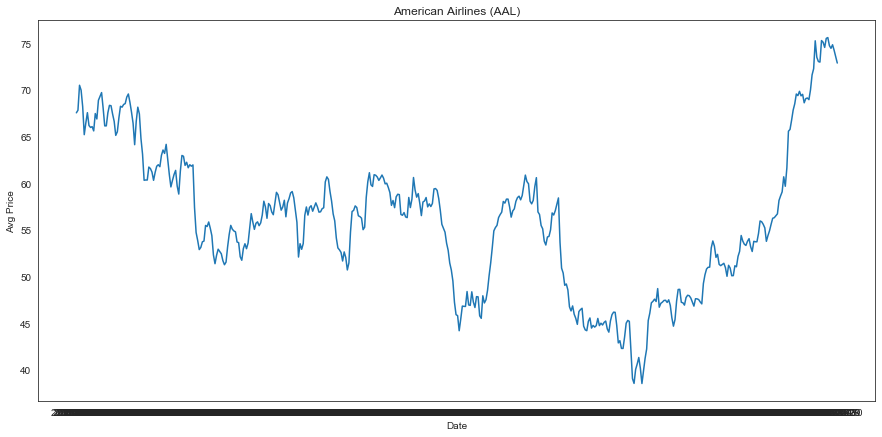

In [39]:
## Stock market
import seaborn as sns

# Preparing the dataset
X_AAL = pd.to_datetime(AAL["Date"])
y_AAL = (AAL["Low"] + AAL["High"])/2

X_DAL = DAL["Date"]
y_DAL = (DAL["Low"] + DAL["High"])/2

X_LUV = LUV["Date"]
y_LUV = (LUV["Low"] + LUV["High"])/2

X_UAL = UAL["Date"]
y_UAL = (UAL["Low"] + UAL["High"])/2

# Initialize the data
data_AAL = pd.DataFrame(data={'Date': X_AAL, 'Avg Price': y_AAL})
data_DAL = pd.DataFrame(data={'Date': X_DAL, 'Avg Price': y_DAL})
data_LUV = pd.DataFrame(data={'Date': X_LUV, 'Avg Price': y_LUV})
data_UAL = pd.DataFrame(data={'Date': X_UAL, 'Avg Price': y_UAL})


# Create an lineplot

plt.figure(figsize=(15,7))
sns.lineplot(x="Date", y="Avg Price", data=data_AAL)
plt.title("American Airlines (AAL)")

plt.figure(figsize=(15,7))
sns.lineplot(x="Date", y="Avg Price", data=data_DAL)
plt.title("American Airlines (AAL)")

plt.figure(figsize=(15,7))
sns.lineplot(x="Date", y="Avg Price", data=data_LUV)
plt.title("American Airlines (AAL)")

plt.figure(figsize=(15,7))
sns.lineplot(x="Date", y="Avg Price", data=data_UAL)
plt.title("American Airlines (AAL)")


In [50]:
# We only keep two classes: positive and negative
tweets['tweet_created'] = pd.to_datetime(tweets['tweet_created'])
df = tweets[["airline_sentiment", "airline_sentiment_confidence", "tweet_created"]]
df = df[df["airline_sentiment"]!= 'neutral'].dropna()
print(df.dtypes)
print(df)

airline_sentiment                                               object
airline_sentiment_confidence                                   float64
tweet_created                   datetime64[ns, pytz.FixedOffset(-480)]
dtype: object
      airline_sentiment  airline_sentiment_confidence  \
1              positive                        0.3486   
3              negative                        1.0000   
4              negative                        1.0000   
5              negative                        1.0000   
6              positive                        0.6745   
...                 ...                           ...   
14633          negative                        1.0000   
14634          negative                        0.6684   
14635          positive                        0.3487   
14636          negative                        1.0000   
14638          negative                        1.0000   

                  tweet_created  
1     2015-02-24 11:15:59-08:00  
3     2015-02-24 11:

In [51]:
# Taking the hours and minutes from tweet_created column and standarize to (0,1)
df["h_min"] = df["tweet_created"].dt.hour / (24 * 60) + df["tweet_created"].dt.minute / 60
df = df.drop(columns=['tweet_created'])
print(df)

      airline_sentiment  airline_sentiment_confidence     h_min
1              positive                        0.3486  0.257639
3              negative                        1.0000  0.257639
4              negative                        1.0000  0.240972
5              negative                        1.0000  0.240972
6              positive                        0.6745  0.224306
...                 ...                           ...       ...
14633          negative                        1.0000  0.025000
14634          negative                        0.6684  0.025000
14635          positive                        0.3487  0.025000
14636          negative                        1.0000  0.990972
14638          negative                        1.0000  0.990972

[11541 rows x 3 columns]


In [52]:
# How many values for each class ? 
df['airline_sentiment'].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [53]:
# Each class on the sample needs to be equally represented (50% neg and 50% pos). We select len(y_pos) negative ratings to maximize the size of the sample
df_pos = df[df["airline_sentiment"] == 'positive'].dropna()
df_neg = (df[df['airline_sentiment'] =='negative']).sample(n=len(df_pos))
df = np.vstack((df_pos, df_neg))
print(df)

[['positive' 0.3486 0.25763888888888886]
 ['positive' 0.6745 0.22430555555555556]
 ['positive' 0.6559 0.1909722222222222]
 ...
 ['negative' 1.0 0.80625]
 ['negative' 1.0 0.7041666666666666]
 ['negative' 0.6859999999999999 0.08541666666666667]]


In [46]:
# Spliting the df into the Target Value (airline_sentiment) and feature value (airline_sentiment_confidence)
X = df[:,1:3]
y = df[:,0]
print(X)

[[0.3486 0.25763888888888886]
 [0.6745 0.22430555555555556]
 [0.6559 0.1909722222222222]
 ...
 [1.0 0.5923611111111111]
 [1.0 0.027777777777777776]
 [1.0 0.2152777777777778]]


In [20]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)
LR = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)
LR.fit(X_train,y_train)
print(LR.score(X_train,y_train))
print(LR.score(X_test, y_test))


ValueError: Expected 2D array, got 1D array instead:
array=[1.42430108e+18 1.42421024e+18 1.42458771e+18 ... 1.42456387e+18
 1.42465413e+18 1.42474161e+18].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")

In [22]:
plt.figure(1, figsize=(10, 7))

# Plot also the training points
plt.scatter(X_train[:, 1], X_train[:, 0], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('airline_sentiment_confidence', fontsize=15)
plt.ylabel('time', fontsize=15)

plt.xlim(X_train[:, 1].min(), X_train[:, 1].max())
plt.ylim(X_train[:, 0].min() - 0.05, X_train[:, 0].max() + 0.05)
plt.xticks(())
plt.yticks(())

plt.show()

ValueError: Can only tuple-index with a MultiIndex

<Figure size 720x504 with 0 Axes>

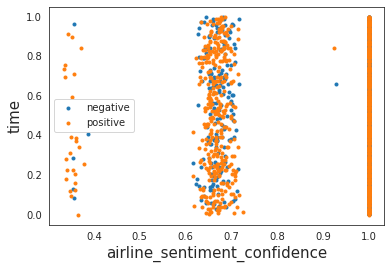

In [71]:
df = pd.DataFrame(dict(x=X_train[0:2000,0], y=X_train[0:2000,1], label=y_train[0:2000]))

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=6, label=name)
ax.legend()

plt.xlabel('airline_sentiment_confidence', fontsize=15)
plt.ylabel('time', fontsize=15)


plt.show()

In [25]:
#Use a tool for airline sentment (we use a tool to tell us if pos, neg or neutral)
from textblob import TextBlob

ModuleNotFoundError: No module named 'textblob'